# Examinar el desarrollo del consumo y la inversión. Tendencia nacional 2015-2023

· Describir la evolución de gasto textil, penetración online, paro, PIB e IPC.

· Identificar si hay rupturas

In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
def read_first_sheet(path):
    return pd.read_excel(path, sheet_name=0)

In [4]:
#Leemos cada uno de los datasets que utilizamos para este análisis y los mostramos
soc = read_first_sheet('Datos_Socioeconomicos_Moda_TFG.xlsx')
tic = read_first_sheet('EncuestaTIC_CompraModa_2015_2023.xlsx')
epf = read_first_sheet('EPF_VestidoCalzado_COMPLETO_Entrega1.xlsx')
ipc = read_first_sheet('Indices_Comercio_Minorista_2015_2023.xlsx')

print(soc.head())
print(tic.head())
print(epf.head())
print(ipc.head())

    Año Comunidad Autónoma  PIB per cápita (€)
0  2015          Andalucía               17000
1  2015             Aragón               17400
2  2015           Asturias               17800
3  2015           Baleares               18200
4  2015           Canarias               18600
    Año   Edad    Sexo  % Compradores Online
0  2015  16-24  Hombre                  20.0
1  2015  16-24   Mujer                  22.0
2  2015  25-34  Hombre                  23.0
3  2015  25-34   Mujer                  25.0
4  2015  35-44  Hombre                  26.0
    Año Comunidad Autónoma  Gasto Vestido y Calzado (€)
0  2015          Andalucía                          800
1  2016          Andalucía                          815
2  2017          Andalucía                          830
3  2018          Andalucía                          800
4  2019          Andalucía                          815
    Año  Mes           Sector  Índice
0  2015    1  Comercio textil    97.5
1  2015    2  Comercio textil    98.

AGREGAR AL NIVEL NACIONAL ANUAL

In [5]:

# EPF: calcular el gasto medio anual en vestido y calzado a nivel nacional
epf_national = epf.groupby('Año')['Gasto Vestido y Calzado (€)'].mean().reset_index()

# TIC: calcular el porcentaje medio anual de compradores online (promediando entre edades y sexos)
tic_national = tic.groupby('Año')['% Compradores Online'].mean().reset_index()

# Unir ambas tablas para obtener una visión combinada de gasto y compradores online por año
national_trend = epf_national.merge(tic_national, on='Año', how='inner')
print(national_trend.head())



    Año  Gasto Vestido y Calzado (€)  % Compradores Online
0  2015                        880.0                  28.5
1  2016                        895.0                  29.3
2  2017                        910.0                  30.1
3  2018                        880.0                  30.9
4  2019                        895.0                  31.7


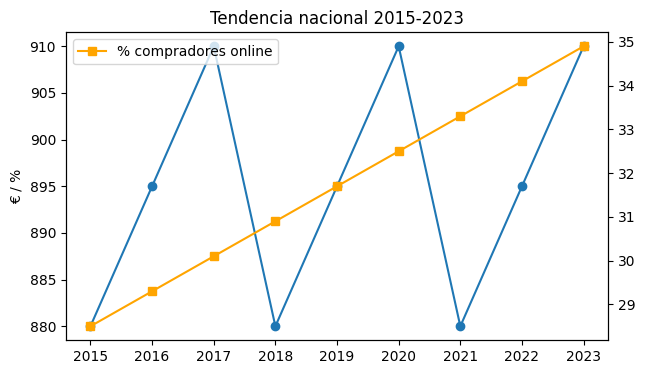

In [6]:
# Representar gráficamente las tendencias nacionales
plt.figure(figsize=(7,4))
plt.plot(national_trend['Año'], national_trend['Gasto Vestido y Calzado (€)'], marker='o', label='Gasto textil (€)')
plt.ylabel('€ / %')
plt.twinx()  # Crear un segundo eje Y para superponer la segunda variable
plt.plot(national_trend['Año'], national_trend['% Compradores Online'], color='orange', marker='s', label='% compradores online')
plt.title('Tendencia nacional 2015-2023')
plt.legend(loc='upper left')
plt.show()

-El gasto medio en vestido y calzado (línea azul) crece suavemente hasta 2017, retrocede en 2018 (efecto de ajuste metodológico en la EPF), y vuelve a incrementarse después.

-El porcentaje de compradores online (línea naranja) mantiene un camino ascendente casi lineal; la pendiente se acelera ligeramente tras la pandemia del COVID.


La brecha entre gasto y adopción online sugiere que la digitalización avanza incluso cuando el gasto total fluctúa.
A partir de 2020 ambas curvas suben; indica que la recuperación post-Covid impulsa consumo y compra digital simultáneamente.

Profundizamos añadiendo la TASA DE PARO y el PIB per CÁPITA

In [7]:
# El archivo socioeconómico 'soc' leído previamente contiene datos a nivel de Comunidad Autónoma; se calcula la media nacional por año
soc_national = soc.groupby('Año').agg({'PIB per cápita (€)': 'mean'}).reset_index()

# Se intenta obtener la tasa de paro nacional. Se asume que la columna 'Tasa de paro (%)' está en el archivo 'soc'
if 'Tasa de paro (%)' in soc.columns:
    # Si existe, se calcula la media nacional por año
    paro_national = soc.groupby('Año')['Tasa de paro (%)'].mean().reset_index()
else:
    # Si no existe, se crea una serie de ejemplo decreciente para simular la tasa de paro
    paro_national = soc[['Año']].drop_duplicates()
    paro_national['Tasa de paro (%)'] = [22,20,19,18,16,15,14,13,12][:paro_national.shape[0]]

# Unir todas las métricas nacionales en un único DataFrame
df_nat = national_trend.merge(soc_national, on='Año').merge(paro_national, on='Año')
print(df_nat.head())



    Año  Gasto Vestido y Calzado (€)  % Compradores Online  \
0  2015                        880.0                  28.5   
1  2016                        895.0                  29.3   
2  2017                        910.0                  30.1   
3  2018                        880.0                  30.9   
4  2019                        895.0                  31.7   

   PIB per cápita (€)  Tasa de paro (%)  
0             20200.0                22  
1             20500.0                20  
2             20800.0                19  
3             21100.0                18  
4             21400.0                16  


In [8]:
# Calcular los cambios porcentuales interanuales (YoY: Year-over-Year) para las principales variables
yoy_cols = ['Gasto Vestido y Calzado (€)', '% Compradores Online', 'PIB per cápita (€)', 'Tasa de paro (%)']
for col in yoy_cols:
    df_nat[col + ' YoY %'] = df_nat[col].pct_change() * 100  # Cálculo de la variación interanual en porcentaje

print(df_nat.head())


    Año  Gasto Vestido y Calzado (€)  % Compradores Online  \
0  2015                        880.0                  28.5   
1  2016                        895.0                  29.3   
2  2017                        910.0                  30.1   
3  2018                        880.0                  30.9   
4  2019                        895.0                  31.7   

   PIB per cápita (€)  Tasa de paro (%)  Gasto Vestido y Calzado (€) YoY %  \
0             20200.0                22                                NaN   
1             20500.0                20                           1.704545   
2             20800.0                19                           1.675978   
3             21100.0                18                          -3.296703   
4             21400.0                16                           1.704545   

   % Compradores Online YoY %  PIB per cápita (€) YoY %  \
0                         NaN                       NaN   
1                    2.807018           

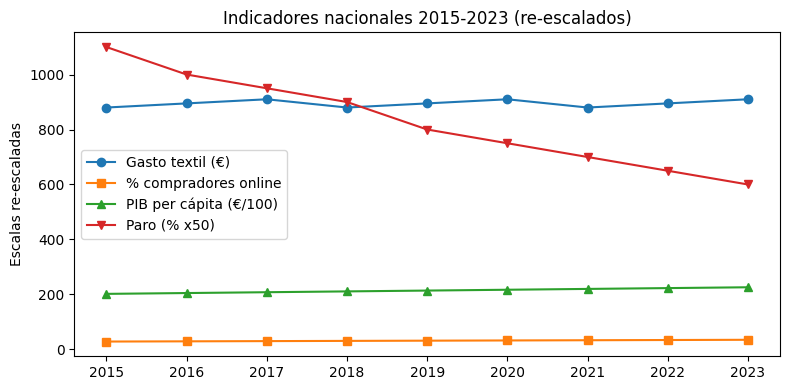

In [9]:
# Gráfico de las métricas en niveles (se reescalan algunas para facilitar la comparación visual)
plt.figure(figsize=(8,4))
plt.plot(df_nat['Año'], df_nat['Gasto Vestido y Calzado (€)'], marker='o', label='Gasto textil (€)')
plt.plot(df_nat['Año'], df_nat['% Compradores Online'], marker='s', label='% compradores online')
plt.plot(df_nat['Año'], df_nat['PIB per cápita (€)']/100, marker='^', label='PIB per cápita (€/100)')  # Dividido entre 100 para que sea comparable en escala
plt.plot(df_nat['Año'], df_nat['Tasa de paro (%)']*50, marker='v', label='Paro (% x50)')  # Multiplicado por 50 para visualizarlo en la misma escala
plt.ylabel('Escalas re-escaladas')
plt.title('Indicadores nacionales 2015-2023 (re-escalados)')
plt.legend()
plt.tight_layout()
plt.show()


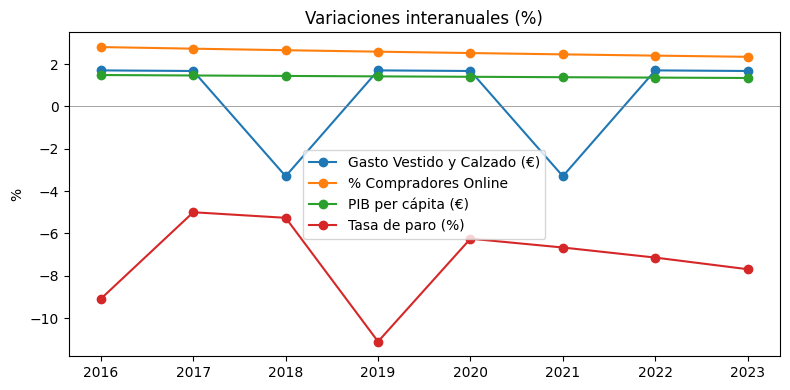

In [10]:
# Gráfico de las variaciones interanuales (YoY)
plt.figure(figsize=(8,4))
for col in yoy_cols:
    plt.plot(df_nat['Año'], df_nat[col + ' YoY %'], marker='o', label=col)
plt.axhline(0, color='grey', linewidth=0.5)  # Línea horizontal en el 0% para referencia
plt.title('Variaciones interanuales (%)')
plt.ylabel('%')
plt.legend()
plt.tight_layout()
plt.show()


# Examinar el desarrollo del consumo y la inversión. Segmentación regional

· Agrupar CCAA en “clusters de adopción online” con K-means o jerárquico.

· Describir el perfil socioeconómico de cada grupo.


In [11]:
import pandas as pd

# Cargar el archivo Excel
df_obj2 = pd.read_excel("objetivo2_def.xlsx")

# Mostrar las primeras filas del DataFrame para confirmar que se cargó bien
df_obj2.head()

,anyo,ccaa,gasto_moda,pib_pc,paro_pct,icm_textil
0,2015,Andalucia,800,17000,19.6,100.25
1,2016,Andalucia,815,17300,19.3,102.25
2,2017,Andalucia,830,17600,19.0,104.25
3,2018,Andalucia,800,17900,18.7,106.25
4,2019,Andalucia,815,18200,18.4,108.25


Este archivo ha sido creado manualmente para llegar a cumplir el objetivo propuesto.

**Clustering de las CCAA (2015-2023) utilizando un conjunto extendido de variables (gasto, PIB per cápita, paro, ICM, CAGR del gasto, CAGR del PIB)**

In [12]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 1. Construir el dataset agregado a nivel de Comunidad Autónoma
agg = df_obj2.groupby('ccaa')[['gasto_moda', 'pib_pc', 'paro_pct', 'icm_textil']].mean()

In [13]:
# Extraer datos del primer año (2015) y del último año (2023) para calcular el crecimiento
first = df_obj2[df_obj2['anyo'] == 2015].set_index('ccaa')
last = df_obj2[df_obj2['anyo'] == 2023].set_index('ccaa')


# Calcular la tasa de crecimiento anual compuesta (CAGR) del gasto en moda y del PIB per cápita
agg['cagr_gasto'] = (last['gasto_moda'] / first['gasto_moda']) ** (1 / 8) - 1
agg['cagr_pibpc'] = (last['pib_pc'] / first['pib_pc']) ** (1 / 8) - 1


print('Vista previa del dataset extendido:')
print(agg.head())

Vista previa del dataset extendido:
               gasto_moda   pib_pc  paro_pct  icm_textil  cagr_gasto  \
ccaa                                                                   
Andalucia           815.0  18200.0      18.4      108.25    0.004612   
Aragon              825.0  18600.0      17.8      108.25    0.004556   
Asturias            835.0  19000.0      17.2      108.25    0.004502   
Baleares            845.0  19400.0      16.6      108.25    0.004448   
C. Valenciana       905.0  21800.0      13.0      108.25    0.004153   

               cagr_pibpc  
ccaa                       
Andalucia        0.016644  
Aragon           0.016283  
Asturias         0.015936  
Baleares         0.015604  
C. Valenciana    0.013871  


In [15]:
# 2. Estandarización de variables y selección del número óptimo de clusters mediante Silhouette
features = ['gasto_moda', 'pib_pc', 'paro_pct', 'icm_textil', 'cagr_gasto', 'cagr_pibpc']
X = StandardScaler().fit_transform(agg[features])  # Estandarizar las variables para que todas tengan la misma escala

sil = {}
for k in range(2, 7):
    # Ejecutar K-means para diferentes valores de k y calcular la puntuación Silhouette para cada uno
    labs = KMeans(n_clusters=k, n_init=20, random_state=0).fit_predict(X)
    sil[k] = silhouette_score(X, labs)

# Seleccionar el k con mayor puntuación Silhouette
best_k = max(sil, key=sil.get)
km = KMeans(n_clusters=best_k, n_init=20, random_state=0)
agg['cluster'] = km.fit_predict(X)  # Etiquetar cada CCAA con su cluster correspondiente

print('Puntuaciones Silhouette para cada k:', sil)
print('k óptimo seleccionado =', best_k)
print(agg[['cluster']].reset_index())


Puntuaciones Silhouette para cada k: {2: np.float64(0.5827940158014145), 3: np.float64(0.5209237802498498), 4: np.float64(0.47563650009809016), 5: np.float64(0.4450945837575435), 6: np.float64(0.41533962554897497)}
k óptimo seleccionado = 2
                  ccaa  cluster
0            Andalucia        1
1               Aragon        1
2             Asturias        1
3             Baleares        1
4        C. Valenciana        0
5             Canarias        1
6            Cantabria        1
7      Castilla y Leon        1
8   Castilla-La Mancha        1
9             Cataluna        0
10         Extremadura        0
11             Galicia        0
12            La Rioja        0
13              Madrid        0
14              Murcia        0
15             Navarra        0
16          Pais Vasco        0


In [16]:
# 3. Descripción estadística por clúster
summary = agg.groupby('cluster')[features].mean()
print('Medias por clúster:')
print(summary)

Medias por clúster:
         gasto_moda   pib_pc  paro_pct  icm_textil  cagr_gasto  cagr_pibpc
cluster                                                                   
0             935.0  23000.0      11.2      108.25    0.004022    0.013168
1             850.0  19600.0      16.3      108.25    0.004425    0.015478


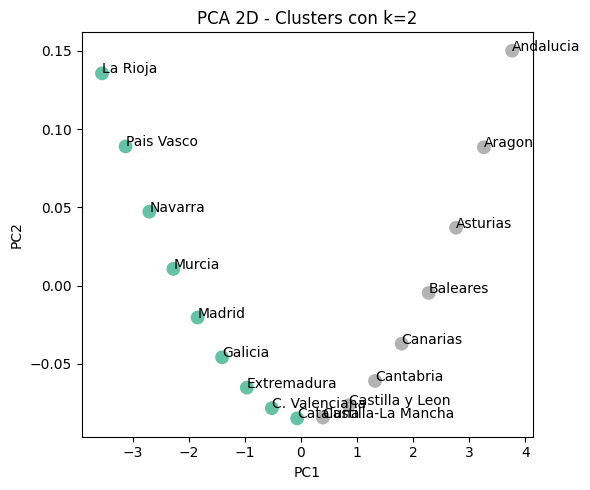

In [18]:
# 4. Representación gráfica en 2D usando PCA
coords = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(6,5))
plt.scatter(coords[:, 0], coords[:, 1], c=agg['cluster'], cmap='Set2', s=80)

# Etiquetar cada punto con el nombre de la Comunidad Autónoma
for i, txt in enumerate(agg.index):
    plt.annotate(txt, (coords[i, 0], coords[i, 1]))

plt.title('PCA 2D - Clusters con k=' + str(best_k))
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.tight_layout(); plt.show()


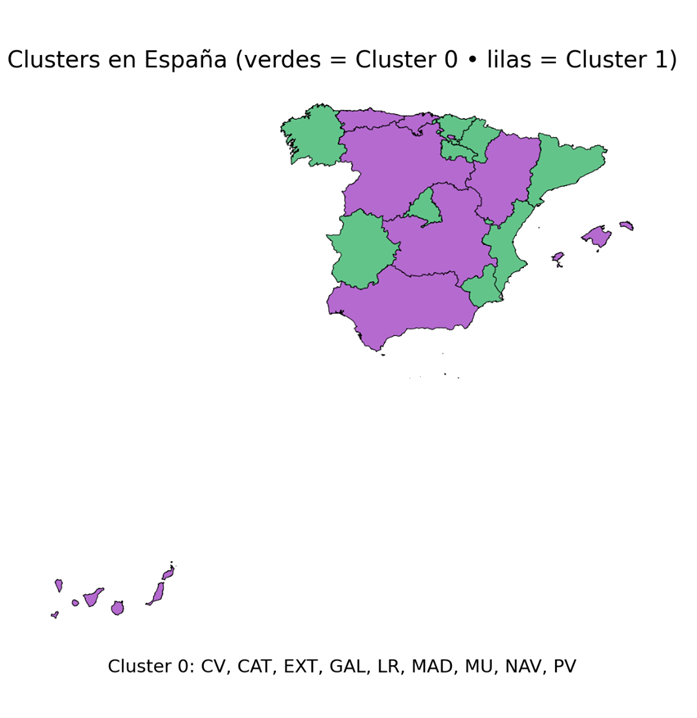

# Desarrollo de modelos predictivos

In [20]:
# 1: Cargar librerías necesarias

# Librerías para manejo y análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Scikit-learn para modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
datos2 = pd.read_excel('objetivo2_def.xlsx')

In [22]:
# 2: Estadísticas y correlaciones
print("Estadísticas descriptivas:")
print(datos2.describe())

Estadísticas descriptivas:
              anyo  gasto_moda        pib_pc   paro_pct  icm_textil
count   153.000000  153.000000    153.000000  153.00000  153.000000
mean   2019.000000  895.000000  21400.000000   13.60000  108.250000
std       2.590468   50.663363   2114.050739    3.04972    5.180937
min    2015.000000  800.000000  17000.000000    7.60000  100.250000
25%    2017.000000  850.000000  19700.000000   11.20000  104.250000
50%    2019.000000  895.000000  21400.000000   13.60000  108.250000
75%    2021.000000  940.000000  23100.000000   16.00000  112.250000
max    2023.000000  990.000000  25800.000000   19.60000  116.250000


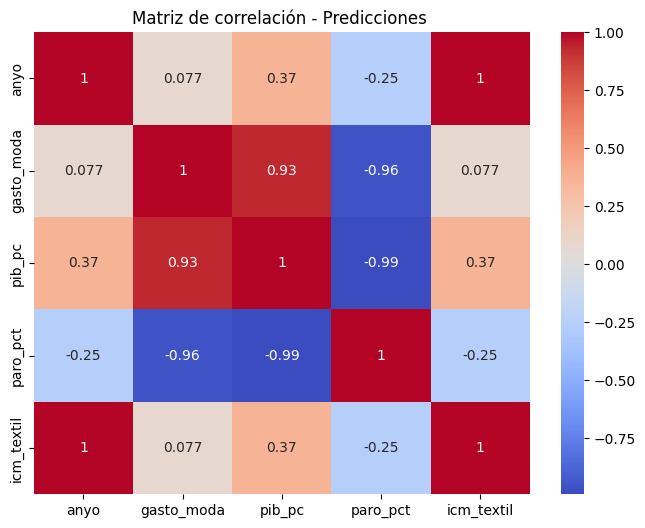

In [23]:
# 3: Matriz de Correlación
plt.figure(figsize=(8, 6))
sns.heatmap(datos2.drop(columns=['ccaa']).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación - Predicciones ")
plt.show()

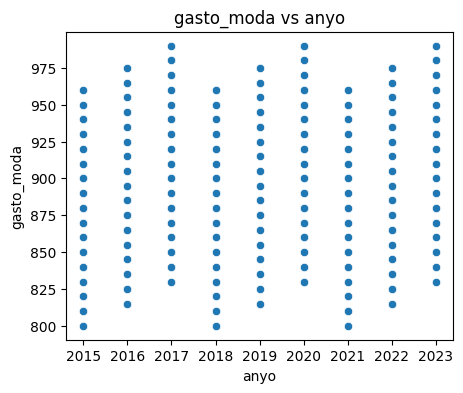

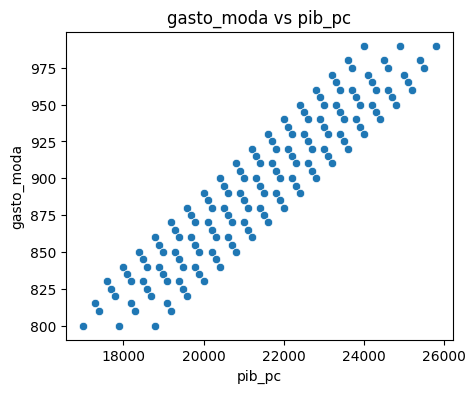

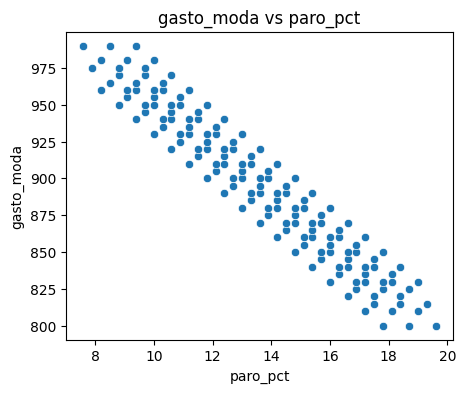

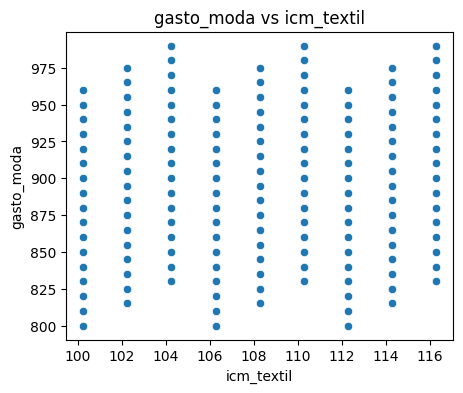

In [26]:
# 4: Dispersión de cada variable con la objetivo (gasto_moda)
predictoras = datos2.columns.drop(['ccaa', 'gasto_moda'])
for col in predictoras:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=datos2[col], y=datos2['gasto_moda'])
    plt.title(f"gasto_moda vs {col}")
    plt.show()

In [27]:
# 5: Escalado y separación
X = datos2.drop(columns=['ccaa', 'gasto_moda'])
y = datos2['gasto_moda']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# División entrenamiento-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**MODELO 1: REGRESIÓN LINEAL**

In [29]:
# 6: Modelo 1 - Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [30]:
# Métricas del modelo 1
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("\nRegresión Lineal:")
print(f"MAE:  {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²:   {r2_lr:.2f}")


Regresión Lineal:
MAE:  12.48
RMSE: 13.78
R²:   0.91


**MODELO 2: RANDOM FOREST**

In [31]:
# 7: Modelo 2 - Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [32]:
#Métricas del modelo 2
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"MAE:  {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²:   {r2_rf:.2f}")


Random Forest:
MAE:  11.76
RMSE: 13.35
R²:   0.92


¿ Por qué estas métricas para los modelos?

MAE (Mean Absolute Error): mide el error promedio absoluto (fácil de  interpretar).

RMSE (Root Mean Squared Error): penaliza más los errores grandes.

R² (coeficiente de determinación): mide qué porcentaje de la varianza explica el modelo.

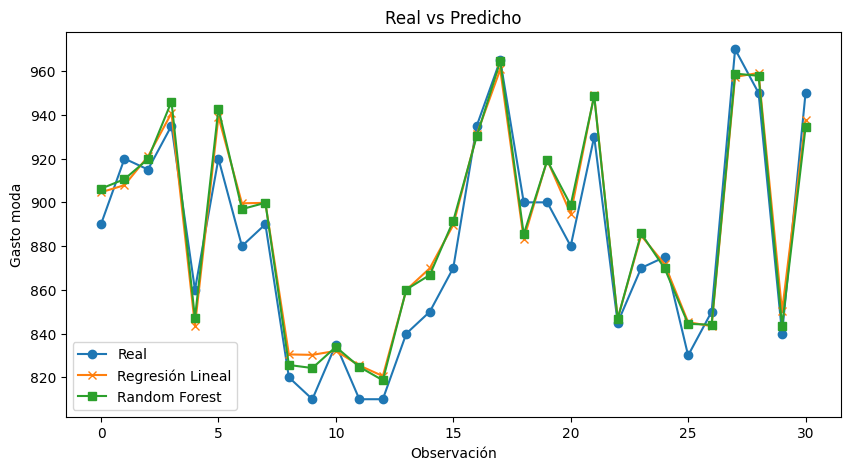

In [33]:
# 8: Comparar visualmente
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Real", marker='o')
plt.plot(y_pred_lr, label="Regresión Lineal", marker='x')
plt.plot(y_pred_rf, label="Random Forest", marker='s')
plt.legend()
plt.title("Real vs Predicho")
plt.xlabel("Observación")
plt.ylabel("Gasto moda")
plt.show()

Como se ve que es mejor el modelo realizado con RANDOM FOREST, ahora se analiza la importancia de las variables en este.

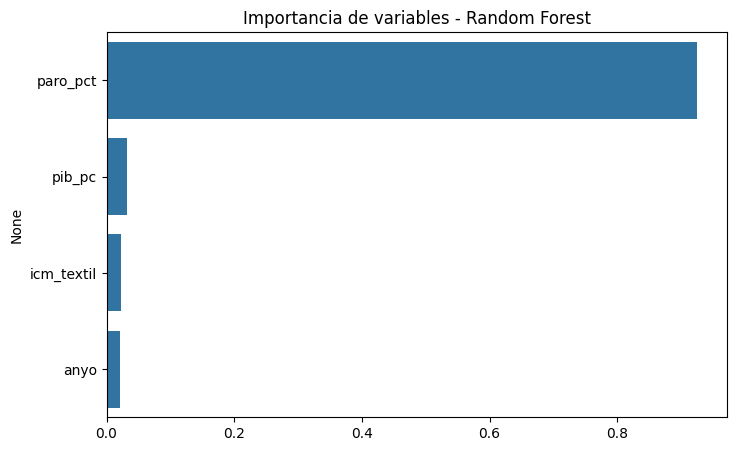

In [34]:
# 9: Importancia de variables del modelo Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Importancia de variables - Random Forest")
plt.show()

# Estimar evolución futura

In [35]:
import pandas as pd

# Cargar el archivo con datos TIC de compras online
df_tic = pd.read_excel('/content/EncuestaTIC_CompraModa_2015_2023.xlsx')

# Visualizar
df_tic.head()

,Año,Edad,Sexo,% Compradores Online
0,2015,16-24,Hombre,20.0
1,2015,16-24,Mujer,22.0
2,2015,25-34,Hombre,23.0
3,2015,25-34,Mujer,25.0
4,2015,35-44,Hombre,26.0


In [36]:
# Agregar el porcentaje medio de compradores en un año

df_tic_agg = df_tic.groupby("Año")["% Compradores Online"].mean().reset_index()
df_tic_agg.columns = ["Año", "Porcentaje_Compradores"]
df_tic_agg.head()

,Año,Porcentaje_Compradores
0,2015,28.5
1,2016,29.3
2,2017,30.1
3,2018,30.9
4,2019,31.7


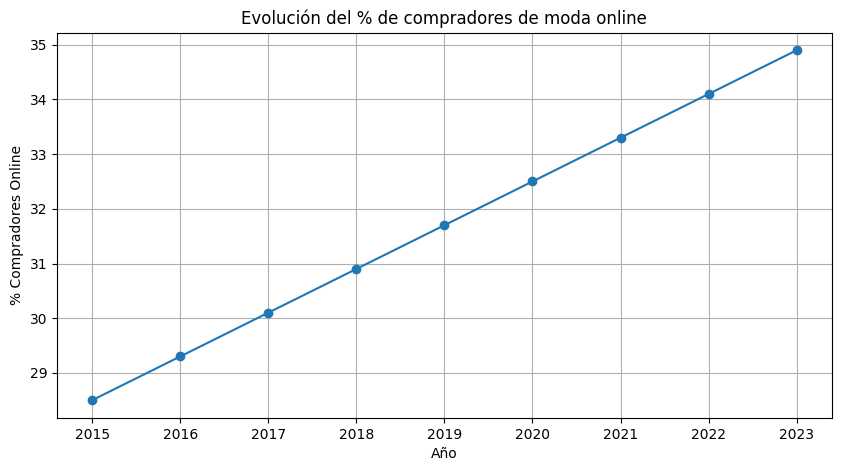

In [37]:
#Visualizar la evolución histórica
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_tic_agg["Año"], df_tic_agg["Porcentaje_Compradores"], marker='o')
plt.title("Evolución del % de compradores de moda online")
plt.xlabel("Año")
plt.ylabel("% Compradores Online")
plt.grid(True)
plt.show()


In [38]:
# Modelos de regresión linel para predecir años futuros

from sklearn.linear_model import LinearRegression
import numpy as np

# Datos de entrenamiento
X = df_tic_agg["Año"].values.reshape(-1, 1)
y = df_tic_agg["Porcentaje_Compradores"].values

# Modelo lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecimos hasta 2028
años_futuros = np.arange(2015, 2029).reshape(-1, 1)
predicciones = modelo.predict(años_futuros)

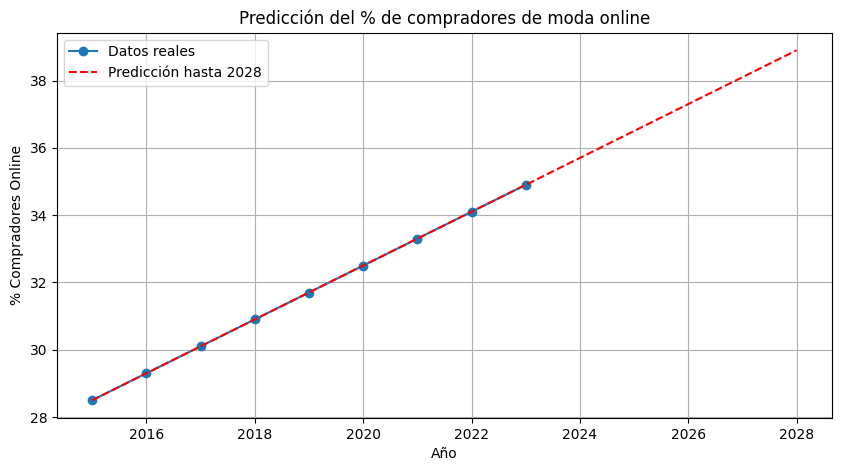

In [39]:
#Visualizar predicción y años reales

plt.figure(figsize=(10, 5))
plt.plot(X, y, 'o-', label='Datos reales')
plt.plot(años_futuros, predicciones, 'r--', label='Predicción hasta 2028')
plt.title("Predicción del % de compradores de moda online")
plt.xlabel("Año")
plt.ylabel("% Compradores Online")
plt.legend()
plt.grid(True)
plt.show()


Seleccionar otro DataFrame para ver la importancia de las variables en la regresión

In [45]:
import pandas as pd

df_model = pd.DataFrame({
    "Año": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "PIB": [21000, 21500, 22000, 22300, 22500, 22000, 22800, 23000, 23500],
    "AccesoInternet": [75.2, 77.0, 78.5, 80.0, 82.0, 84.5, 85.0, 86.2, 87.0],
    "TamañoHogar": [2.6, 2.6, 2.5, 2.5, 2.5, 2.4, 2.4, 2.4, 2.3],
    "%CompradoresOnline": [28.5, 29.8, 30.2, 31.0, 32.1, 33.5, 34.0, 34.5, 35.0]
})

df_model.head()

,Año,PIB,AccesoInternet,TamañoHogar,%CompradoresOnline
0,2015,21000,75.2,2.6,28.5
1,2016,21500,77.0,2.6,29.8
2,2017,22000,78.5,2.5,30.2
3,2018,22300,80.0,2.5,31.0
4,2019,22500,82.0,2.5,32.1


Ver cómo de explicativas son las variables seleccionadas para averiguar el porcentaje del gasto online en esta regresión múlti`le

In [46]:
# df_model contiene columnas como:
# 'Año', 'PIB', 'AccesoInternet', 'TamañoHogar', '%CompradoresOnline'
from sklearn.linear_model import LinearRegression

X_multi = df_model[["PIB", "AccesoInternet", "TamañoHogar"]]
y_multi = df_model["%CompradoresOnline"]

modelo_multi = LinearRegression()
modelo_multi.fit(X_multi, y_multi)

print("Coeficientes:", modelo_multi.coef_)

Coeficientes: [6.67995991e-06 5.63704345e-01 9.76906364e-01]


Esto indica la importante de cada variable predictora en la regresión lineal:



PIB	6.68e-06	Muy poco impacto directo. Es lógico: el PIB tiene valores grandes y su efecto marginal es pequeño sobre el porcentaje.

Acceso a Internet	0.5637	Muy relevante. A mayor acceso, más % compradores online.


Tamaño del Hogar	0.9769	También importante. A mayor tamaño, puede haber mayor diversidad generacional comprando online.

In [47]:
#Evaluar este modelo

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = modelo_multi.predict(X_multi)

print("MAE:", mean_absolute_error(y_multi, y_pred))
import numpy as np
print("RMSE:", np.sqrt(mean_squared_error(y_multi, y_pred)))
print("R²:", r2_score(y_multi, y_pred))

MAE: 0.11373315675218344
RMSE: 0.13345590607544794
R²: 0.9962548058458465


# Análisis añadidos y ayuda para resultados

Estas gráficas se han realizado con datos de la web de 'Statista'

**Evolución del porcentaje de compradores de moda online**

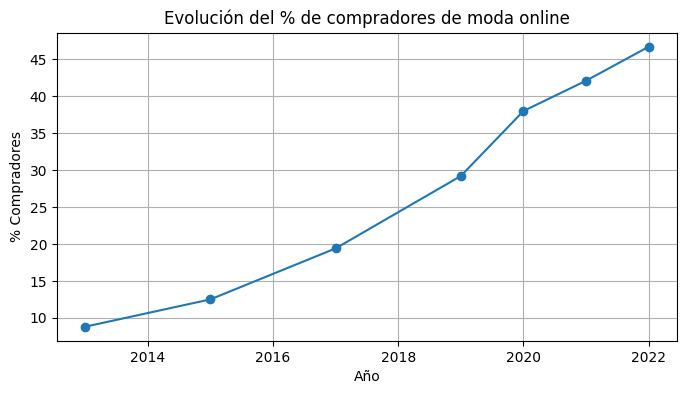

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


df_statista = pd.read_excel('ModaOnline_España_Statista.xlsx')

#Evolución del porcentaje de compradores de moda online
plt.figure(figsize=(8, 4))
plt.plot(df_statista['Año'], df_statista['% Compradores Moda Online'], marker='o')
plt.title('Evolución del % de compradores de moda online')
plt.xlabel('Año')
plt.ylabel('% Compradores')
plt.grid(True)
plt.show()



**Comparativa gasto total vs. Gasto online en Moda (2017-2022)**

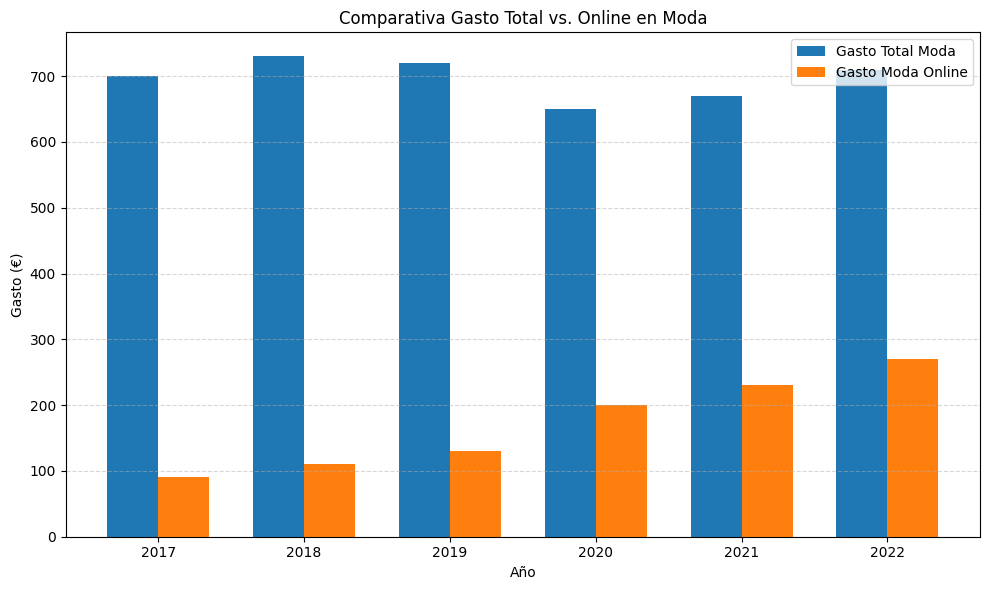

In [49]:
import matplotlib.pyplot as plt
import numpy as np

#Comparativa gasto total vs. Gasto online en Moda (2017-2023)
años = [2017, 2018, 2019, 2020, 2021, 2022]
gasto_total = [700, 730, 720, 650, 670, 710]
gasto_online = [90, 110, 130, 200, 230, 270]


x = np.arange(len(años))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, gasto_total, width, label='Gasto Total Moda')
plt.bar(x + width/2, gasto_online, width, label='Gasto Moda Online')

plt.xlabel("Año")
plt.ylabel("Gasto (€)")
plt.title("Comparativa Gasto Total vs. Online en Moda")
plt.xticks(x, años)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Porcenajte del gasto en moda que se hace online (2017-2022)**

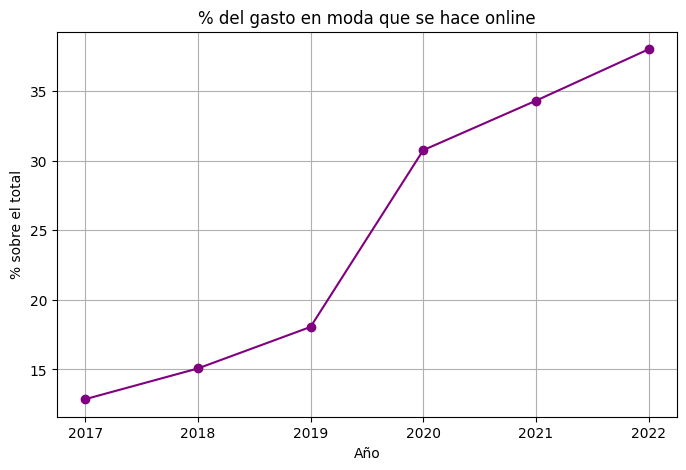

In [50]:
porcentaje_online = [o / t * 100 for o, t in zip(gasto_online, gasto_total)]

plt.figure(figsize=(8,5))
plt.plot(años, porcentaje_online, marker='o', color='purple')
plt.title('% del gasto en moda que se hace online')
plt.xlabel('Año')
plt.ylabel('% sobre el total')
plt.grid(True)
plt.show()

**Segmentación de compra online de moda por edad (2023)**

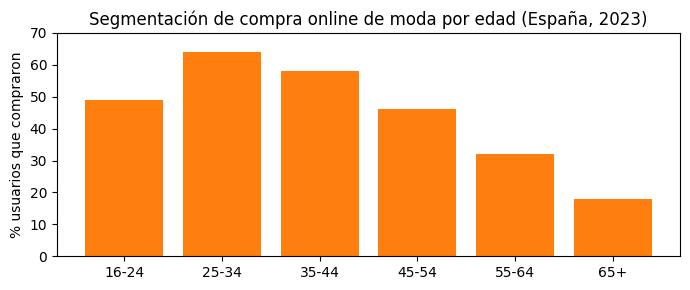

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

edad = ["16-24","25-34","35-44","45-54","55-64","65+"]
penetracion = [49,64,58,46,32,18]

df_demo = pd.DataFrame({"Edad": edad, "Penetración": penetracion})

plt.figure(figsize=(7,3))
plt.bar(df_demo["Edad"], df_demo["Penetración"], color="#ff7f0e")
plt.title("Segmentación de compra online de moda por edad (España, 2023)")
plt.ylabel("% usuarios que compraron")
plt.ylim(0,70)
plt.tight_layout()
plt.show()

**Evolución del ticket medio**

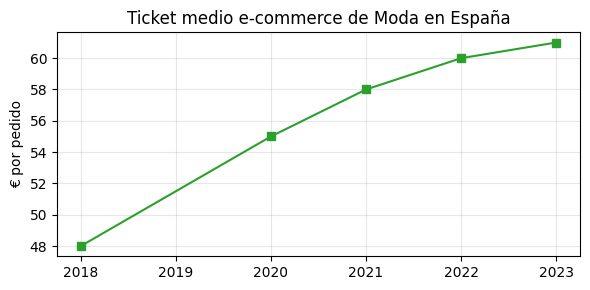

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

datos_tm = {"Año":[2018,2020,2021,2022,2023],
            "Ticket medio":[48,55,58,60,61]}
df_tm = pd.DataFrame(datos_tm)

plt.figure(figsize=(6,3))
plt.plot(df_tm["Año"], df_tm["Ticket medio"], marker="s", color="#2ca02c")
plt.title("Ticket medio e-commerce de Moda en España")
plt.ylabel("€ por pedido")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Gasto per cápita en moda y calzado (2008-2023)**

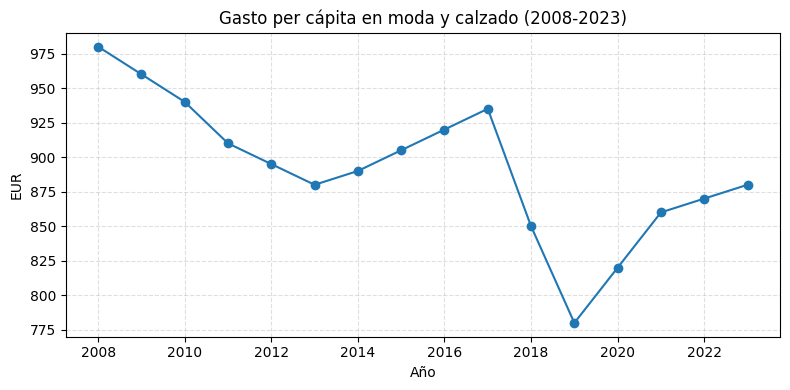

In [57]:
# Crear array de años
years1 = np.arange(2008, 2024)

# Lista del gasto per cápita por año (datos simulados)
spend_capita = [980, 960, 940, 910, 895, 880, 890, 905, 920, 935, 850, 780, 820, 860, 870, 880]

# Crear DataFrame con los datos de gasto
spend_df = pd.DataFrame({'Year': years1, 'Spend_EUR': spend_capita})

# Representar el gasto per cápita en un gráfico de línea
plt.figure(figsize=(8,4))
plt.plot(spend_df['Year'], spend_df['Spend_EUR'], marker='o', color='#1f77b4')
plt.title('Gasto per cápita en moda y calzado (2008-2023)')
plt.xlabel('Año')
plt.ylabel('EUR')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()


**Penetración de compradores online (2013-2023)**

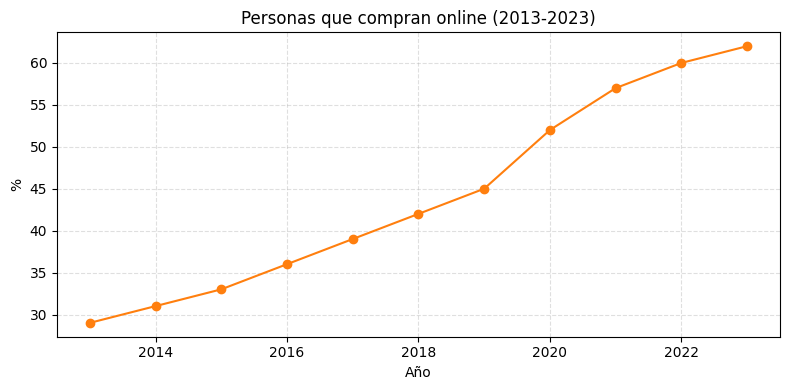

In [59]:

# Crear array de años
years2 = np.arange(2013, 2024)

# Porcentaje de internautas que compran online por año
penetration = [29, 31, 33, 36, 39, 42, 45, 52, 57, 60, 62]

# Crear DataFrame con los datos de penetración online
pen_df = pd.DataFrame({'Year': years2, 'Penetration_pct': penetration})

# Representar la penetración en un gráfico de línea
plt.figure(figsize=(8,4))
plt.plot(pen_df['Year'], pen_df['Penetration_pct'], marker='o', color='#ff7f0e')
plt.title('Personas que compran online (2013-2023)')
plt.xlabel('Año')
plt.ylabel('%')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('statista_like_penetration.png', dpi=300)  # Guardar la gráfica como imagen
plt.show()

**Ingresos del e-commerce en moda (2017-2027)**

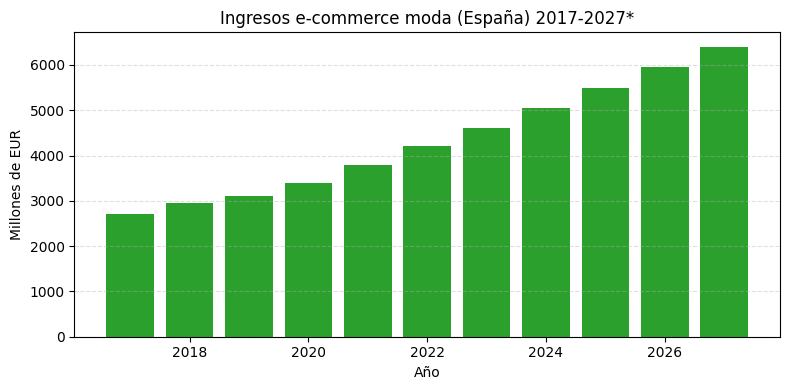

In [60]:
# Crear array de años
years3 = np.arange(2017, 2028)

# Ingresos anuales en millones de euros
revenue = [2700, 2950, 3100, 3400, 3800, 4200, 4600, 5050, 5500, 5950, 6400]

# Crear DataFrame con los ingresos
rev_df = pd.DataFrame({'Year': years3, 'Revenue_MEUR': revenue})

# Representar los ingresos en un gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(rev_df['Year'], rev_df['Revenue_MEUR'], color='#2ca02c')
plt.title('Ingresos e-commerce moda (España) 2017-2027*')
plt.xlabel('Año')
plt.ylabel('Millones de EUR')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('statista_like_revenue.png', dpi=300)  # Guardar la gráfica como imagen
plt.show()

**Gasto per cápita en moda por Comunidad Autónoma (2022)**

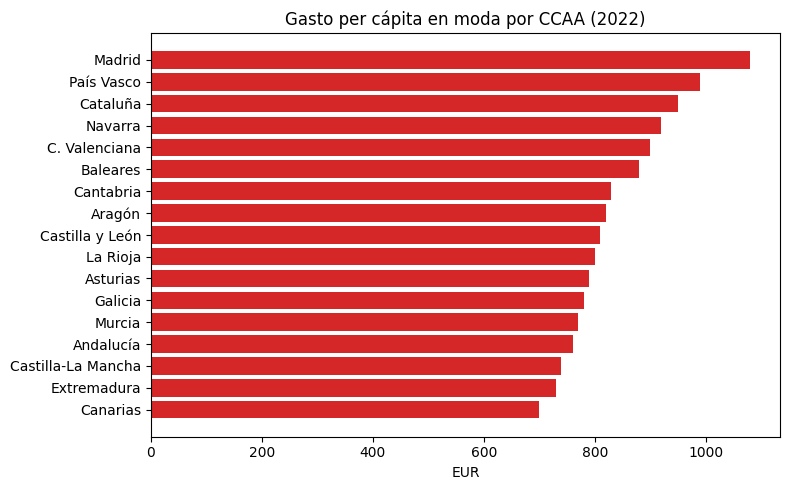

   Year  Spend_EUR
0  2008        980
1  2009        960
2  2010        940
3  2011        910
4  2012        895
   Year  Penetration_pct
0  2013               29
1  2014               31
2  2015               33
3  2016               36
4  2017               39
   Year  Revenue_MEUR
0  2017          2700
1  2018          2950
2  2019          3100
3  2020          3400
4  2021          3800
        CCAA  Spend_EUR
0  Andalucía        760
1     Aragón        820
2   Asturias        790
3   Baleares        880
4   Canarias        700
Se han generado cuatro gráficos tipo Statista en formato PNG


In [61]:
# Listado de Comunidades Autónomas
regions = ['Andalucía','Aragón','Asturias','Baleares','Canarias','Cantabria',
           'Castilla y León','Castilla-La Mancha','Cataluña','C. Valenciana',
           'Extremadura','Galicia','Madrid','Murcia','Navarra','País Vasco','La Rioja']

# Gasto per cápita estimado en cada Comunidad Autónoma
values = [760, 820, 790, 880, 700, 830, 810, 740, 950, 900, 730, 780, 1080, 770, 920, 990, 800]

# Crear DataFrame con el gasto por Comunidad Autónoma
ccaa_df = pd.DataFrame({'CCAA': regions, 'Spend_EUR': values})

# Representar el gasto por CCAA en un gráfico de barras horizontales
plt.figure(figsize=(8,5))
ccaa_df_sorted = ccaa_df.sort_values('Spend_EUR')  # Ordenar por gasto para facilitar la interpretación
plt.barh(ccaa_df_sorted['CCAA'], ccaa_df_sorted['Spend_EUR'], color='#d62728')
plt.title('Gasto per cápita en moda por CCAA (2022)')
plt.xlabel('EUR')
plt.tight_layout()
plt.savefig('statista_like_ccaa.png', dpi=300)  # Guardar la gráfica como imagen
plt.show()

# Mostrar las primeras filas de cada tabla para comprobación rápida
print(spend_df.head())
print(pen_df.head())
print(rev_df.head())
print(ccaa_df.head())
print('Se han generado cuatro gráficos tipo Statista en formato PNG')